 # NE 630 - Lesson 28

**LAST TIME**: Neutron kinetics with delayed neutron precursors.

**TODAY**: Some applications of kinetics with precursors.

**NEXT TIME**: Read 5.6 and come prepared with questions for the exam.

# Review: Kinetics with Precursors 

### The Average Lifetime Increases

$$
\begin{split}
 \bar{l} &= (1-\beta)l + \beta l_d \\
         &= l + \beta/\lambda
\end{split}
 \tag{Lewis 5.36}
$$

### Example 1. 

Here, $\lambda$ is the average decay constant for the precursors.  For ${}^{235}$U, what is $\lambda$?

In [7]:
betas = np.array([0.00021, 0.00142, 0.00128, 0.00257, 0.00075, 0.00027])
thalfs = np.array([56, 23, 6.2, 2.3, 0.61, 0.23])
lambdas = np.log(2)/thalfs
print(lambdas)
one_over_lambda = 1/sum(betas) * sum(betas/lambdas)
lambda_avg = 1/one_over_lambda
lambda_avg

[0.01237763 0.03013683 0.11179793 0.30136834 1.13630685 3.01368339]


0.07664087859545618

### The Model becomes a First-Order System

$$
\begin{equation}
  \boxed{\frac{dn}{dt} = \left ( \frac{\rho(t) - \beta}{\Lambda} \right ) n(t) + \sum^N_{i=1} \lambda_i C_i (t) + S(t)}  \, ,
  \tag{Lewis 5.47}
\end{equation}
$$

where $\beta = \sum^N_{i=1} \beta_i$, and

$$
\begin{equation}
  \boxed{\frac{d C_i}{dt} = -\lambda_i C_i(t) + \frac{\beta_i}{\Lambda} n(t) \, \quad i = 1, 2, \ldots N } \, .
  \tag{Lewis 5.48}
\end{equation}
$$

$$
\begin{equation}
 \frac{d}{dt}  
   \overbrace{\left [ \begin{array}{c} n(t) \\ C_1(t) \\  \vdots \\ C_N(t) \end{array} \right ]}^{\mathbf{y}(t)}
 =
   \overbrace{\left [ \begin{array}{cccc}
       (\rho(t)-\beta)/\Lambda        & \lambda_1 & \ldots & \lambda_N \\
       \beta_1 /\Lambda  & -\lambda_1 & \ldots & 0        \\
                             \vdots & \vdots & \ddots & \vdots        \\
       \beta_N /\Lambda  & 0 & \ldots & -\lambda_N \\
   \end{array} \right ]}^{\mathbf{A}(t)} \times
   \left [ \begin{array}{c} n(t) \\ C_1(t) \\  \vdots \\ C_N(t) \end{array} \right ] +
   \overbrace{\left [ \begin{array}{c} S(t) \\ 0 \\  \vdots \\ 0 \end{array} \right ]}^{\mathbf{b}(t)} \, .
\end{equation}
$$

### The Solution is Not Trivial!

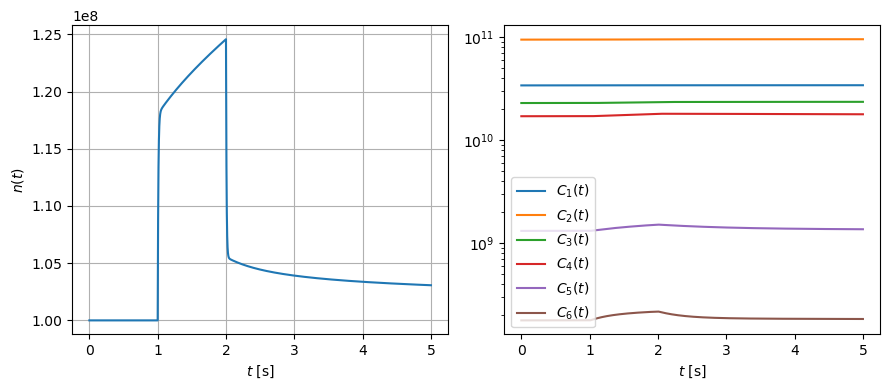

(Step insertion of $\rho = 0.001$ during $1 < t < 2$ s)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


n0 = 1e8
Lambda = 5e-5

def f(y, t, rho, betas, lambdas, Lambda):
    n, C = y[0], y[1:] 
    beta = sum(betas)
    dydt = np.zeros(7)
    dydt[0] = ((rho(t)-beta)/Lambda)*n + sum(C*lambdas)
    dydt[1:] = -C*lambdas + betas*n/Lambda
    return dydt

y0 = np.zeros(7)
y0[0] = n0
y0[1:] = betas * n0 / (lambdas * Lambda)

In [4]:
def solve_it(rho, scale="linear", tmax=5, return_vals = False):
    
    times = np.linspace(0, tmax, 10000)
    
    y = odeint(f, y0, times, args=(rho, betas, lambdas, Lambda))
    n = y[:, 0]
    C = y[:, 1:]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
    for i in range(6):
        axes[1].plot(times, C[:, i], label=f"$C_{{{i+1}}}(t)$")
    plt.xlabel("$t$ [s]")
    plt.yscale("log")
    axes[1].legend();
    axes[0].plot(times, n, label="$n(t)$")
    axes[0].set_ylabel("$n(t)$")
    axes[0].set_xlabel("$t$ [s]")
    axes[0].set_yscale(scale)
    axes[1].set_yscale(scale)
    axes[0].grid(True, which="both", ls="-")
    plt.tight_layout();
    
    if return_vals:
        return n, C, times

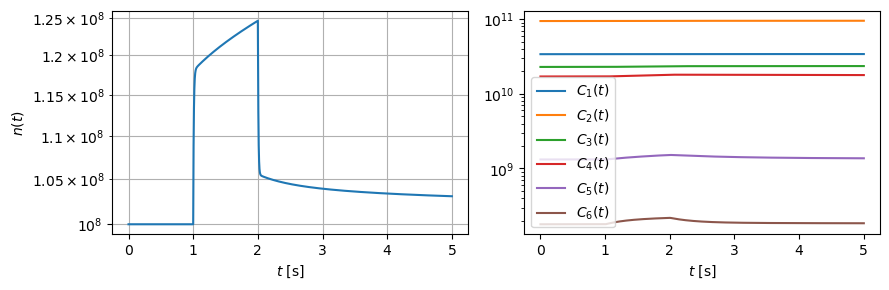

In [8]:
solve_it(rho=lambda t: 0.001 if 1 < t < 2 else 0, scale="log")

# Applications with Step Reactivities

### Example 2

For $\rho = \beta/2 = 0.00325$, by how much has $n$ increased from its initial value immediately following the insertion of reactivity?

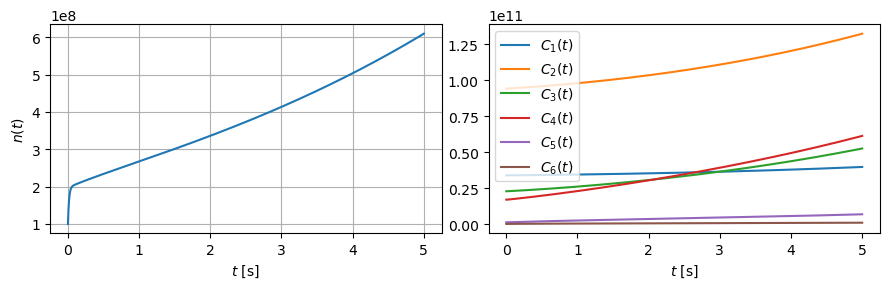

In [9]:
solve_it(rho=lambda t: 0.00325, scale="linear")


This "eye-ball reasoning" is equivalent to the **prompt jump approximation**:

$$
   \frac{|\rho|}{\beta} = \frac{n_0}{n_1} - 1 \, .
   \tag{Lewis 5.63}
$$

where $n_1$ is value almost immediately following the insertion.  However, this expression is for *negative* reactivity.  A more general expression is

$$
  \frac{n_1}{n_0} = \frac{\beta - \rho_0}{\beta - \rho_1} \, ,
  \tag{Prompt Jump Approximation}
$$

where $\rho_0$ and $\rho_1$ are the initial and final reactivities.  For an initially critical reactor, $\rho_0 = 0$.

In [16]:
0.0065/(0.0065-0.00325)

2.0

### Example 3 

I was operating the reactor at steady state when I dropped my borated Android phone into the reactor pool at $t = 0$.  The neutron density looked like the following image:

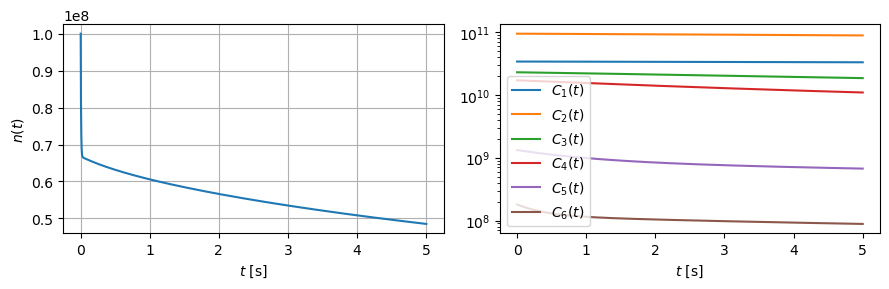

What's the reactivity worth of my phone in dollars?  In pcm?

In [11]:
n0 = 1;  n1=0.66666;   (n0/n1-1)*sum(betas)

0.0032500975009750097

### Example 4

Estimate the reactor period for a step insertion of $\rho = 0.001$ based on (a) the following plot, and (b) based on

$$
  T \approx \frac{\beta}{\rho \lambda} \, .
  \tag{Lewis 5.57}
$$

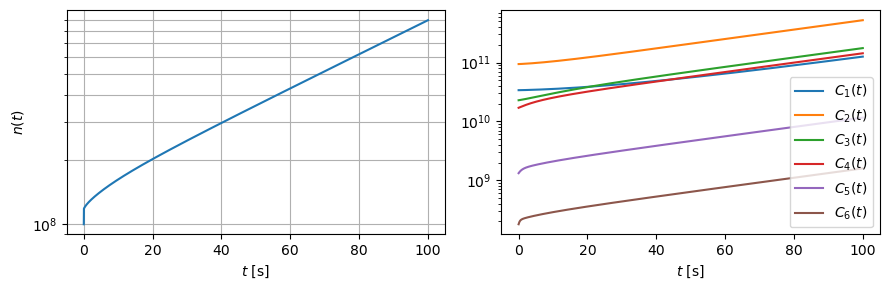

In [12]:
n, C, t = solve_it(rho=lambda t: 0.001, scale="log", tmax=100, return_vals=True)

 $\ln(n(100)/n(40) = (100-40)/T \rightarrow T \approx 54$ s

In [23]:
1/(np.log(9/3)/(100-40)),   (0.0065)/(0.001*0.0766)

(54.61435359761024, 84.85639686684073)

### Example 5

Estimate the reactor period for a step insertion of $\rho = 0.01$ based on (a) the following plot, and (b) based on

$$
  T \approx \frac{\Lambda}{\rho - \beta} \, .
  \tag{Lewis 5.58}
$$

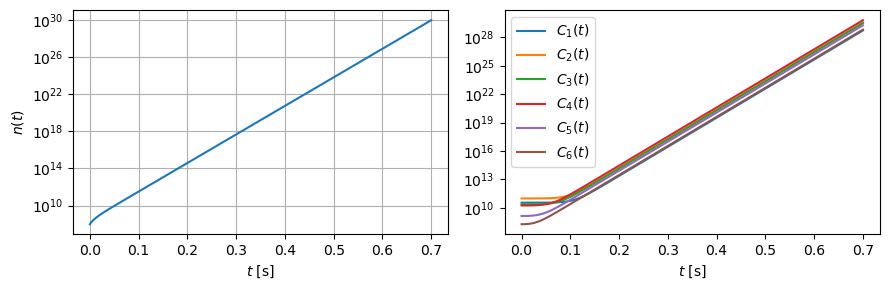

In [15]:
n, C, t = solve_it(rho=lambda t: 0.01, scale="log", tmax=0.7, return_vals=True)

In [20]:
1/(np.log(1e30/1e18)/(0.7-0.3)),  Lambda/(0.01-0.0065)

(0.014476482730108394, 0.014285714285714284)

# Kinetics with "Pen and Paper"

Consider the single-precursor equations *a la* Problem 5.10:

$$
\begin{equation}
  \frac{dn}{dt} = \left ( \frac{\rho(t) - \beta}{\Lambda} \right ) n(t) + \lambda C (t) + S(t) \, ,
\end{equation}
$$


$$
\begin{equation}
  \frac{d C}{dt} = -\lambda C(t) + \frac{\beta}{\Lambda} n(t)  \, .
\end{equation}
$$

Remember the basic steps for solving ODEs:

  - **Step 1**: Write down the equations.
  - **Step 2**: Identify the type and any special features of the differential equation, and rewrite the equation in a "familiar" form.
  - **Step 3**: Integrate the differential equation using the appropriate technique.
  - **Step 4**: Apply initial conditions.

### Option 1: Go to higher order.

Here, **Step 2** could be "write as an equivalent 2nd order equation" and **Step 3** could be "assume the solution is a sum of two exponentials.

In other words,

$$
  n(t) = a e^{\alpha_1 t} + b e^{\alpha_2 t} \quad \text{and} \quad 
  C(t) = a' e^{\alpha_1 t} + b' e^{\alpha_2 t} \, ,
$$

where $a$, $b$, $a'$, and $b'$ are constants (to be determined), and the time constants $\alpha$'s are the roots to the characteristic polynomial.

### Option 2: View in matrix terms.

For no source and constant $\rho$, the equations can be written in the form $\mathbf{y}' = \mathbf{A}\mathbf{y}$, and the solution is $e^{\mathbf{A}t}\mathbf{y}_0$, so, again exponentials.  Here, the eigenvalues of $\mathbf{A}$ are the time constants--these are what you want to tackle for Problem 5.10!  

Here, that matrix comes from

$$
\begin{equation}
 \frac{d}{dt}  
   \overbrace{\left [ \begin{array}{c} n(t) \\ C(t)  \end{array} \right ]}^{\mathbf{y}(t)}
 =
   \overbrace{\left [ \begin{array}{cc}
       (\rho-\beta)/\Lambda        & \lambda \\
       \beta /\Lambda  & -\lambda \\              
   \end{array} \right ]}^{\mathbf{A}(t)} \times
   \left [ \begin{array}{c} n(t) \\ C(t) \end{array} \right ]   \, .
\end{equation}
$$

An eigenvalue $\alpha$ satisfies

$$
  \text{det}(\mathbf{A}-\alpha\mathbf{I}) = 0 \longrightarrow \left(\frac{\rho-\beta}{\Lambda}-\alpha\right)\left(-\lambda-\alpha\right)-\frac{\lambda \beta}{\Lambda} = 0 \, .
$$



### Option 3: Use Laplace Transforms (gasp!)

Go from $n(t)$ to $\mathcal{L}(n) = \tilde{n}(s)$ and $n'(t)$ to $\mathcal{L}(n') = \tilde{n}(s) + n(0)$, etc.